# British Airways Review Analysis: A Data Science Workflow

This notebook documents a data science workflow applied to British Airways customer reviews. It begins with **data scraping** from a public source to collect the raw review data. This is followed by comprehensive **data cleaning and manipulation** using pandas to prepare the text data for analysis. I then conduct **exploratory data analysis (EDA)** and **data visualization** to uncover key insights, patterns, and sentiment distribution within the reviews. Finally, I implement a **model building** step, utilizing topic modeling (Latent Dirichlet Allocation - LDA) to identify the prevalent themes and topics discussed by reviewers. The goal is to gain a better understanding of customer feedback regarding British Airways' services.

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

****

#   1 - Scrape the data from Site

****

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
first_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping Page {i}")
    url = f"{first_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parse_content = BeautifulSoup(content, "html.parser")
    for para in parse_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"------>{len(reviews)} total_reviews")


Scraping Page 1
------>100 total_reviews
Scraping Page 2
------>200 total_reviews
Scraping Page 3
------>300 total_reviews
Scraping Page 4
------>400 total_reviews
Scraping Page 5
------>500 total_reviews
Scraping Page 6
------>600 total_reviews
Scraping Page 7
------>700 total_reviews
Scraping Page 8
------>800 total_reviews
Scraping Page 9
------>900 total_reviews
Scraping Page 10
------>1000 total_reviews


In [3]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."


In [4]:
df.to_csv("british_Ariways_review_dataset.csv")

#   2 - Data manipulation & data cleaning and EDA Visualization

***

**1. Import Liabraires**

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("Libraries imported and NLTK data downloaded.")

Libraries imported and NLTK data downloaded.


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."
...,...
995,Not Verified | Chicago to Zurich via London. D...
996,✅ Trip Verified | Glasgow to London. Smooth fl...
997,✅ Trip Verified | Having booked this flight a ...
998,✅ Trip Verified | I wouldn't even rate them 1...


In [8]:
df['reviews'][0]

"Not Verified |  Check in was smooth enough. Boarding was chaotic. We were herded through the gate only to be held for a seemingly never ending period of time outside next to the apron. We are BA silver members and noticed that despite business class being nearly empty we were not offered the chance to move up a class. The seat pocket in front of me full of the previous passenger's rubbish.  On arrival at Heathrow, our bags took a long time to reach the belt and plenty arrived before ours even though ours were supposed to be priority."

In [10]:
print("\nDataset Info:")
df.info()


print("\nDataset Shape:")
print(df.shape)


print("\nColumn Names:")
print(df.columns)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB

Dataset Shape:
(1000, 1)

Column Names:
Index(['reviews'], dtype='object')


**2. Data Cleaning - Handle Index Column and Extract Verified Status**

In [13]:
df['is_verified'] = df['reviews'].apply(lambda x: '✅ Trip Verified' in x)

In [14]:
df['reviews_cleaned_temp'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=False)
df['reviews_cleaned_temp'] = df['reviews_cleaned_temp'].str.replace('Not Verified |', '', regex=False)

In [15]:
df['reviews_cleaned_temp'] = df['reviews_cleaned_temp'].str.strip()

In [18]:
print("\nDataFrame after adding 'is_verified' column and removing status tags:")
df.head()


DataFrame after adding 'is_verified' column and removing status tags:


,reviews,is_verified,reviews_cleaned_temp
0,Not Verified | Check in was smooth enough. Bo...,False,Check in was smooth enough. Boarding was chaot...
1,✅ Trip Verified | Although transferring to thi...,True,Although transferring to this flight through H...
2,✅ Trip Verified | We are extremely grateful ...,True,We are extremely grateful to the crew of fligh...
3,✅ Trip Verified | I had an appalling experie...,True,I had an appalling experience with British Air...
4,"Not Verified | Good points, the cabin crew, t...",False,"Good points, the cabin crew, they were helpful..."


In [19]:
print("\nValue counts for 'is_verified':")
print(df['is_verified'].value_counts())


Value counts for 'is_verified':
is_verified
True     740
False    260
Name: count, dtype: int64


**3. Data Cleaning - Text Preprocessing (Punctuation, Lowercase, Whitespace)**

In [20]:
# Remove punctuation
df['reviews_cleaned_temp'] = df['reviews_cleaned_temp'].str.replace(r'[^\w\s]', '', regex=True)

In [21]:
# Convert to lowercase
df['reviews_cleaned_temp'] = df['reviews_cleaned_temp'].str.lower()

In [22]:
df['reviews_cleaned_temp'] = df['reviews_cleaned_temp'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [26]:
print("\nDataFrame after removing punctuation, lowercasing, and handling whitespace:")
df['reviews_cleaned_temp'][0]


DataFrame after removing punctuation, lowercasing, and handling whitespace:


'check in was smooth enough boarding was chaotic we were herded through the gate only to be held for a seemingly never ending period of time outside next to the apron we are ba silver members and noticed that despite business class being nearly empty we were not offered the chance to move up a class the seat pocket in front of me full of the previous passengers rubbish on arrival at heathrow our bags took a long time to reach the belt and plenty arrived before ours even though ours were supposed to be priority'

**4. Data Cleaning - Tokenization and Stopword Removal**

In [27]:
# Tokenize the cleaned reviews
df['tokens'] = df['reviews_cleaned_temp'].apply(word_tokenize)

In [28]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens_cleaned'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [29]:
print("\nDataFrame after tokenization and stopword removal:")
print(df[['reviews_cleaned_temp', 'tokens', 'tokens_cleaned']].head())


DataFrame after tokenization and stopword removal:
                                reviews_cleaned_temp  \
0  check in was smooth enough boarding was chaoti...   
1  although transferring to this flight through h...   
2  we are extremely grateful to the crew of fligh...   
3  i had an appalling experience with british air...   
4  good points the cabin crew they were helpful p...   

                                              tokens  \
0  [check, in, was, smooth, enough, boarding, was...   
1  [although, transferring, to, this, flight, thr...   
2  [we, are, extremely, grateful, to, the, crew, ...   
3  [i, had, an, appalling, experience, with, brit...   
4  [good, points, the, cabin, crew, they, were, h...   

                                      tokens_cleaned  
0  [check, smooth, enough, boarding, chaotic, her...  
1  [although, transferring, flight, heathrow, bud...  
2  [extremely, grateful, crew, flight, ba0058, ca...  
3  [appalling, experience, british, airways, star...  

**4. Data Cleaning - Lemmatization**

In [30]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [31]:
# Lemmatize the tokens
df['tokens_lemmatized'] = df['tokens_cleaned'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [32]:
# Join the lemmatized tokens back into a string for easier analysis and modeling
df['review_text_processed'] = df['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

In [33]:
print("\nDataFrame after lemmatization and rejoining tokens:")
print(df[['tokens_lemmatized', 'review_text_processed']].head())


DataFrame after lemmatization and rejoining tokens:
                                   tokens_lemmatized  \
0  [check, smooth, enough, boarding, chaotic, her...   
1  [although, transferring, flight, heathrow, bud...   
2  [extremely, grateful, crew, flight, ba0058, ca...   
3  [appalling, experience, british, airway, start...   
4  [good, point, cabin, crew, helpful, profession...   

                               review_text_processed  
0  check smooth enough boarding chaotic herded ga...  
1  although transferring flight heathrow budapest...  
2  extremely grateful crew flight ba0058 cape tow...  
3  appalling experience british airway started tr...  
4  good point cabin crew helpful professional mat...  


In [34]:
# Drop temporary cleaning columns
df = df.drop(columns=['reviews_cleaned_temp', 'tokens', 'tokens_cleaned'])

print("\nFinal DataFrame columns after cleaning:")
print(df.columns)


Final DataFrame columns after cleaning:
Index(['reviews', 'is_verified', 'tokens_lemmatized', 'review_text_processed'], dtype='object')


**5. EDA - Review Length Analysis**

In [35]:
# Calculate review length (number of words after processing)
df['review_length'] = df['review_text_processed'].apply(lambda x: len(x.split()))

print("\nReview Length Statistics:")
print(df['review_length'].describe())


Review Length Statistics:
count    1000.000000
mean       81.054000
std        56.404863
min        10.000000
25%        41.000000
50%        65.000000
75%       102.000000
max       327.000000
Name: review_length, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


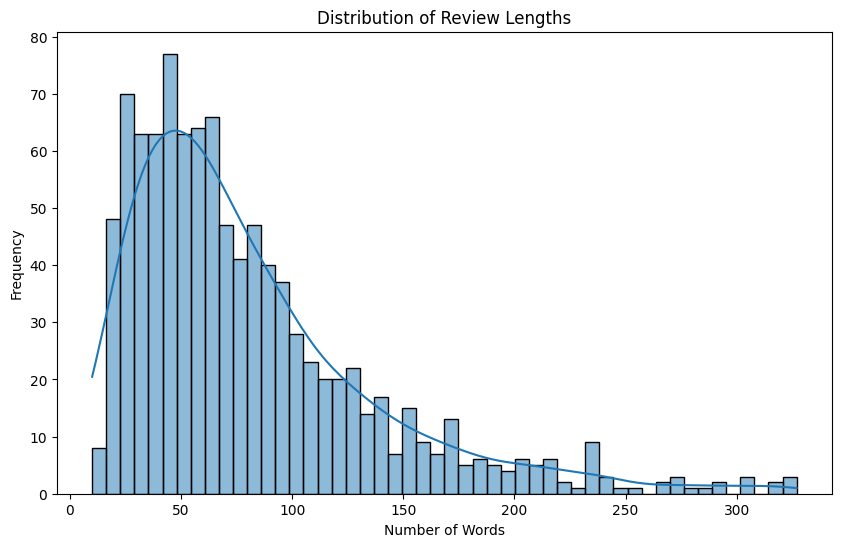

In [36]:
# Visualize review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Compare review lengths by verified status
print("\nReview Length Statistics by Verified Status:")
print(df.groupby('is_verified')['review_length'].describe())


Review Length Statistics by Verified Status:
             count       mean        std   min    25%   50%    75%    max
is_verified                                                              
False        260.0  78.003846  53.925624  14.0  41.75  66.0   95.0  327.0
True         740.0  82.125676  57.247336  10.0  41.00  65.0  105.0  324.0


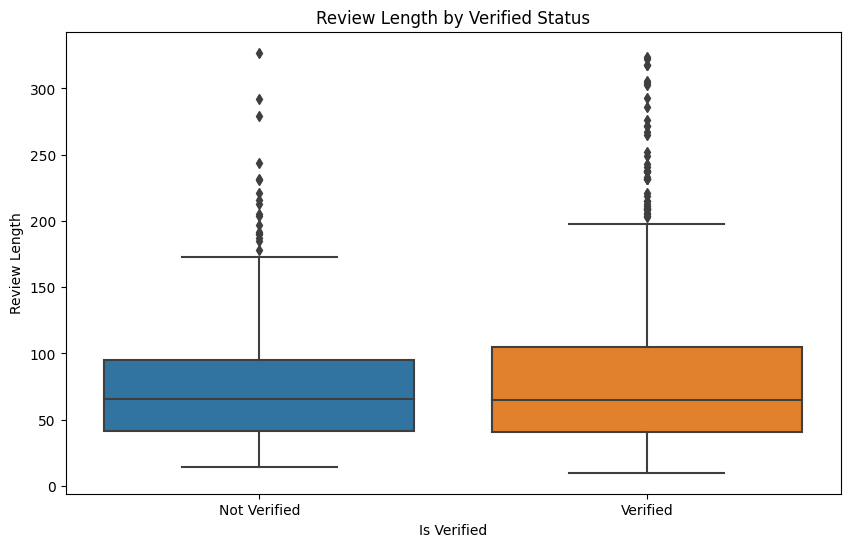

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_verified', y='review_length', data=df)
plt.title('Review Length by Verified Status')
plt.xlabel('Is Verified')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Not Verified', 'Verified'])
plt.show()

**6. EDA - Verified vs. Not Verified Distribution**

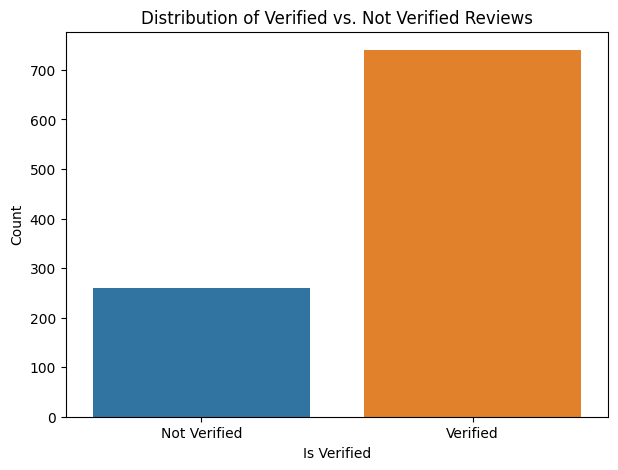


Counts of Verified vs. Not Verified Reviews:
is_verified
True     740
False    260
Name: count, dtype: int64


In [39]:
plt.figure(figsize=(7, 5))
sns.countplot(x='is_verified', data=df)
plt.title('Distribution of Verified vs. Not Verified Reviews')
plt.xlabel('Is Verified')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Verified', 'Verified'])
plt.show()

# Display actual counts
print("\nCounts of Verified vs. Not Verified Reviews:")
print(df['is_verified'].value_counts())

**7. Simple Sentiment Analysis using TextBlob**

In [40]:
# Function to get sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

In [41]:
# Apply sentiment analysis
df['sentiment_polarity'] = df['review_text_processed'].apply(get_sentiment_polarity)

In [43]:
# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1: # Thresholds can be adjusted
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [44]:
df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_sentiment)

In [46]:
print("\nDataFrame with Sentiment Analysis:")
print(df[['reviews', 'sentiment_polarity', 'sentiment_category']].head())




DataFrame with Sentiment Analysis:
                                             reviews  sentiment_polarity  \
0  Not Verified |  Check in was smooth enough. Bo...            0.054167   
1  ✅ Trip Verified | Although transferring to thi...            0.317500   
2  ✅ Trip Verified |   We are extremely grateful ...            0.078333   
3  ✅ Trip Verified |   I had an appalling experie...           -0.058171   
4  Not Verified |  Good points, the cabin crew, t...            0.047050   

  sentiment_category  
0            Neutral  
1           Positive  
2            Neutral  
3            Neutral  
4            Neutral  


In [47]:
print("\nSentiment Category Counts:")
print(df['sentiment_category'].value_counts())


Sentiment Category Counts:
sentiment_category
Neutral     431
Positive    395
Negative    174
Name: count, dtype: int64


**8. EDA - Visualize Sentiment Distribution**

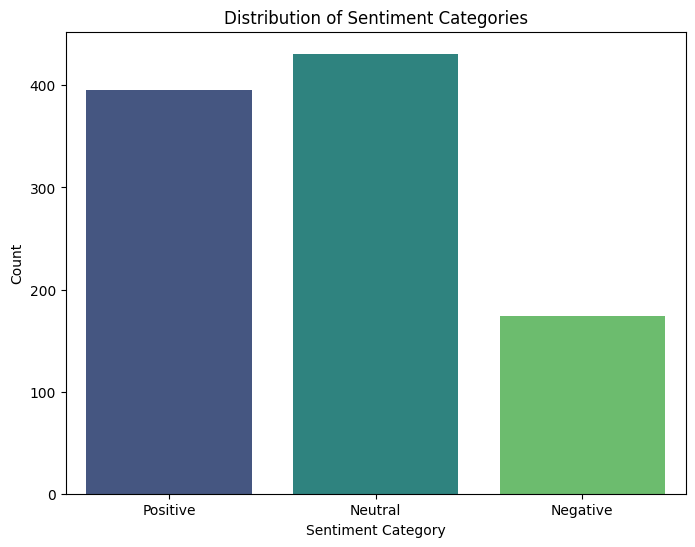

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

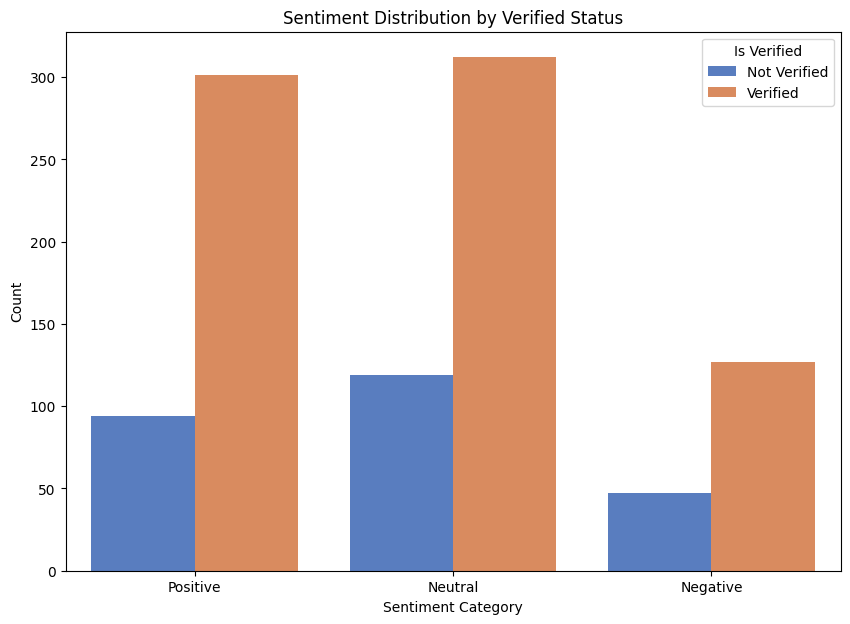

In [49]:
# Sentiment distribution by verified status
plt.figure(figsize=(10, 7))
sns.countplot(x='sentiment_category', hue='is_verified', data=df, order=['Positive', 'Neutral', 'Negative'], palette='muted')
plt.title('Sentiment Distribution by Verified Status')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Is Verified', labels=['Not Verified', 'Verified'])
plt.show()

In [50]:
# Average sentiment polarity by verified status
print("\nAverage Sentiment Polarity by Verified Status:")
print(df.groupby('is_verified')['sentiment_polarity'].mean())


Average Sentiment Polarity by Verified Status:
is_verified
False    0.04559
True     0.06604
Name: sentiment_polarity, dtype: float64


**9. EDA - Sentiment vs. Review Length**

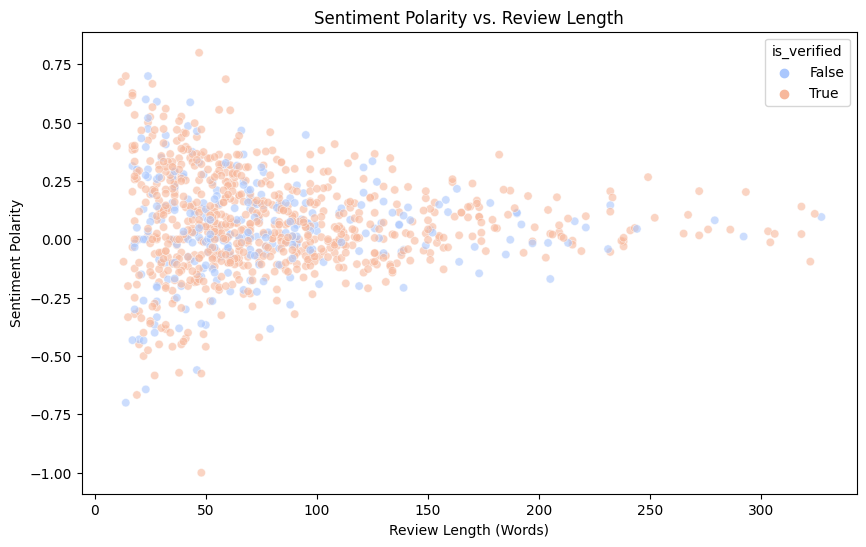

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment_polarity', data=df, alpha=0.6, hue='is_verified', palette='coolwarm')
plt.title('Sentiment Polarity vs. Review Length')
plt.xlabel('Review Length (Words)')
plt.ylabel('Sentiment Polarity')
plt.show()

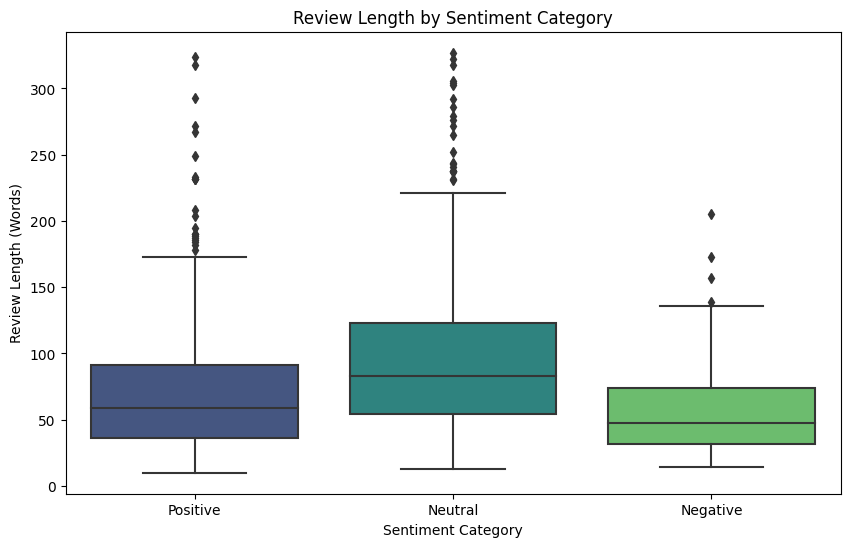

In [52]:
# Consider splitting by sentiment category for length analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='review_length', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Review Length by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Review Length (Words)')
plt.show()

In [53]:
# Print average lengths per sentiment category
print("\nAverage Review Length by Sentiment Category:")
print(df.groupby('sentiment_category')['review_length'].mean())


Average Review Length by Sentiment Category:
sentiment_category
Negative    57.178161
Neutral     97.473318
Positive    73.655696
Name: review_length, dtype: float64


**10. EDA - Most Frequent Words**

In [54]:
# Combine all processed review text into a single string
all_words = ' '.join(df['review_text_processed']).split()

In [55]:
# Get the most common words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30) # Top 30 words

In [56]:
print("\nTop 30 Most Common Words:")
print(most_common_words)


Top 30 Most Common Words:
[('flight', 2271), ('ba', 1362), ('seat', 821), ('service', 773), ('time', 668), ('hour', 604), ('airline', 479), ('crew', 468), ('british', 447), ('one', 442), ('london', 440), ('u', 438), ('food', 438), ('class', 435), ('airway', 432), ('good', 427), ('would', 406), ('business', 402), ('get', 396), ('staff', 387), ('cabin', 387), ('customer', 381), ('day', 331), ('passenger', 325), ('back', 313), ('heathrow', 293), ('told', 293), ('even', 291), ('could', 290), ('check', 282)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


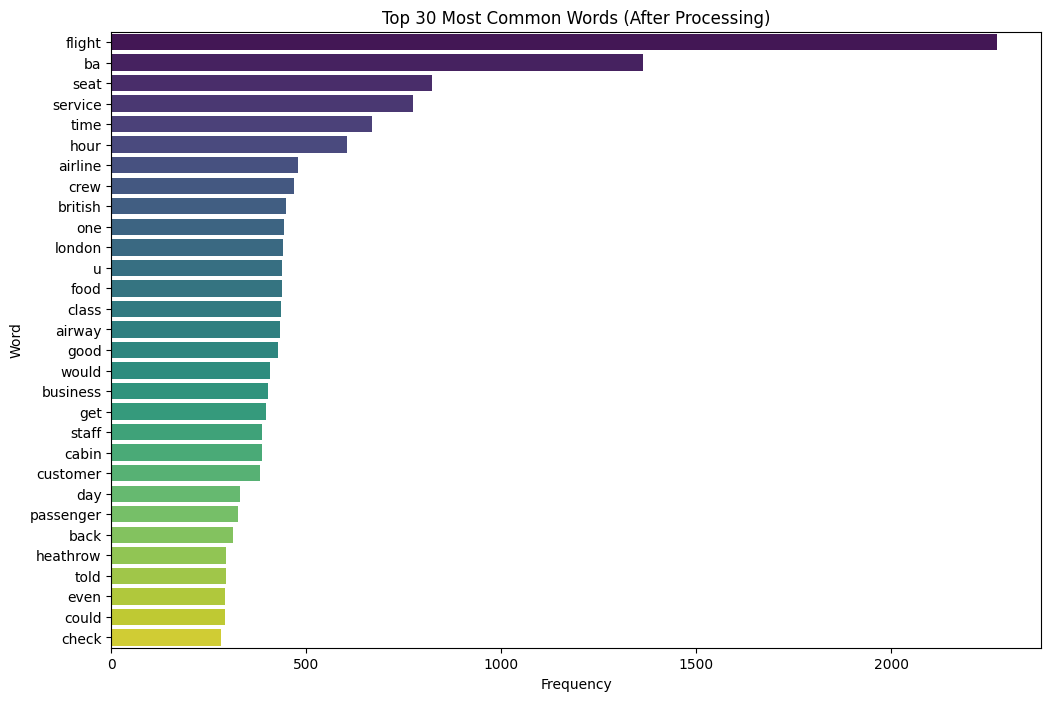

In [57]:
# Visualize the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 30 Most Common Words (After Processing)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

**11. EDA - Word Cloud**

In [58]:
# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review_text_processed']))

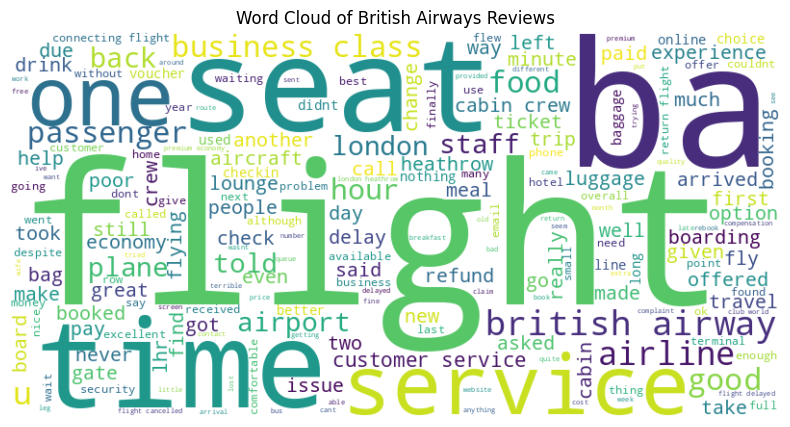

In [59]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Reviews')
plt.show()

**12. EDA - Most Frequent Bigrams (Two-word phrases)**

In [64]:
# Create list of all bigrams
all_bigrams = []
for tokens in df['tokens_lemmatized']:
    bigrams = list(nltk.bigrams(tokens))
    all_bigrams.extend(bigrams)

In [65]:
# Get the most common bigrams
bigram_counts = Counter(all_bigrams)
most_common_bigrams = bigram_counts.most_common(30)

In [66]:
print("\nTop 30 Most Common Bigrams:")
print(most_common_bigrams)


Top 30 Most Common Bigrams:
[(('british', 'airway'), 419), (('business', 'class'), 307), (('customer', 'service'), 231), (('cabin', 'crew'), 186), (('connecting', 'flight'), 97), (('return', 'flight'), 89), (('flight', 'cancelled'), 75), (('london', 'heathrow'), 73), (('flight', 'delayed'), 68), (('club', 'world'), 65), (('premium', 'economy'), 64), (('flight', 'attendant'), 59), (('2', 'hour'), 57), (('even', 'though'), 55), (('hour', 'flight'), 55), (('club', 'europe'), 55), (('cancelled', 'flight'), 52), (('next', 'day'), 50), (('flight', 'london'), 49), (('food', 'drink'), 48), (('first', 'class'), 46), (('ba', 'flight'), 46), (('flight', 'ba'), 43), (('told', 'u'), 42), (('ground', 'staff'), 42), (('bottle', 'water'), 41), (('middle', 'seat'), 40), (('30', 'minute'), 39), (('first', 'time'), 39), (('via', 'london'), 38)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


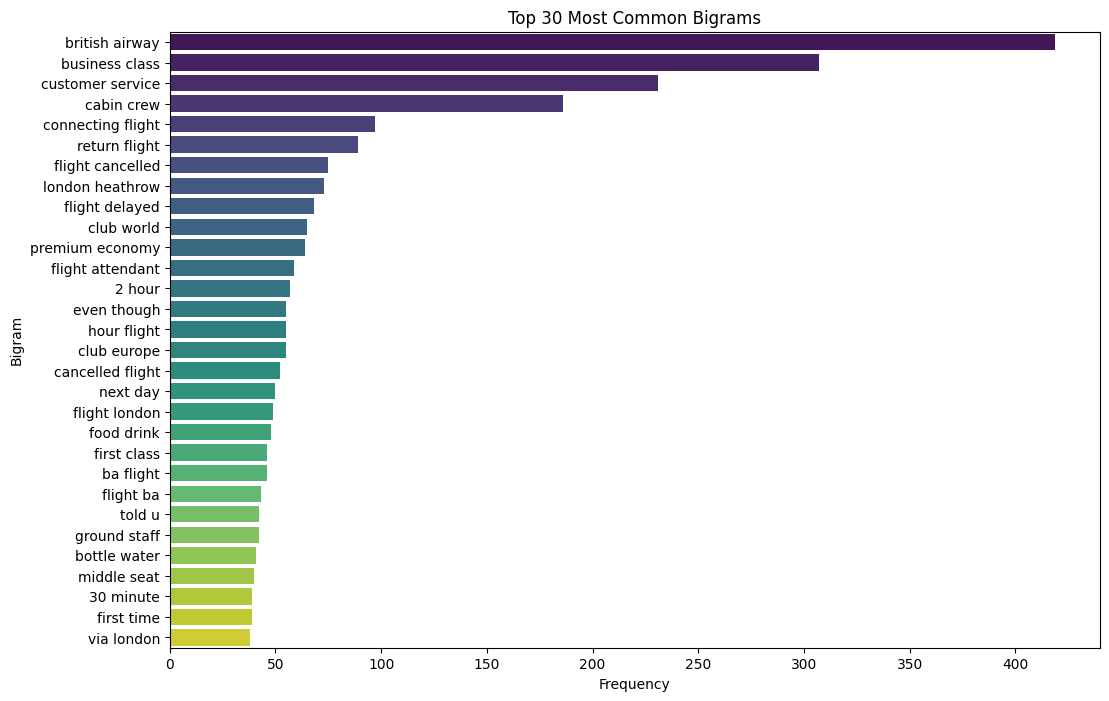

In [68]:
# Visualize the most common bigrams
bigrams_str = [' '.join(bigram) for bigram, count in most_common_bigrams]
counts = [count for bigram, count in most_common_bigrams]

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=bigrams_str, palette='viridis')
plt.title('Top 30 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


In [69]:
# Optionally, look at trigrams
all_trigrams = []
for tokens in df['tokens_lemmatized']:
    trigrams = list(nltk.trigrams(tokens))
    all_trigrams.extend(trigrams)

In [70]:
trigram_counts = Counter(all_trigrams)
most_common_trigrams = trigram_counts.most_common(20)
print("\nTop 20 Most Common Trigrams:")
print(most_common_trigrams)


Top 20 Most Common Trigrams:
[(('business', 'class', 'seat'), 28), (('ba', 'customer', 'service'), 26), (('missed', 'connecting', 'flight'), 18), (('business', 'class', 'passenger'), 18), (('business', 'class', 'ticket'), 16), (('fly', 'british', 'airway'), 16), (('experience', 'british', 'airway'), 15), (('small', 'bottle', 'water'), 15), (('ba', 'business', 'class'), 15), (('british', 'airway', 'flight'), 14), (('flight', 'british', 'airway'), 14), (('new', 'club', 'world'), 13), (('never', 'fly', 'ba'), 13), (('new', 'club', 'suite'), 13), (('world', 'traveller', 'plus'), 11), (('cancelled', 'return', 'flight'), 11), (('cabin', 'crew', 'member'), 10), (('low', 'cost', 'airline'), 10), (('business', 'class', 'flight'), 10), (('british', 'airway', 'customer'), 10)]


**13. EDA - Specific Aspect Mention Analysis**

In [71]:
# Define keywords for common aspects
aspect_keywords = {
    'Check-in': ['checkin', 'check in', 'counter'],
    'Boarding': ['board', 'boarding', 'gate', 'queue', 'line'],
    'Staff': ['staff', 'crew', 'attendant', 'friendly', 'rude'],
    'Seat': ['seat', 'legroom', 'comfortable', 'pitch'],
    'Food': ['food', 'meal', 'catering', 'drink', 'water', 'coffee'],
    'Entertainment': ['entertainment', 'ife', 'screen', 'wifi'],
    'Delay': ['delay', 'late', 'cancel', 'cancelled', 'hour'],
    'Baggage': ['bag', 'luggage', 'suitcase', 'lost', 'delivered'],
    'Customer Service': ['customer service', 'service', 'support', 'helpline', 'phone', 'email'],
    'Lounge': ['lounge', 'galleries', 'concorde', 'club']
}

In [72]:
# Count mentions of each aspect
aspect_counts = {}
for aspect, keywords in aspect_keywords.items():
    count = 0
    for review in df['review_text_processed']:
        # Use regex to find whole word matches for keywords
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', review) for keyword in keywords):
            count += 1
    aspect_counts[aspect] = count

print("\nCounts of Reviews Mentioning Specific Aspects:")
print(aspect_counts)


Counts of Reviews Mentioning Specific Aspects:
{'Check-in': 111, 'Boarding': 383, 'Staff': 548, 'Seat': 436, 'Food': 493, 'Entertainment': 191, 'Delay': 546, 'Baggage': 288, 'Customer Service': 571, 'Lounge': 247}


**14. EDA - Visualize Aspect Mention Counts**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


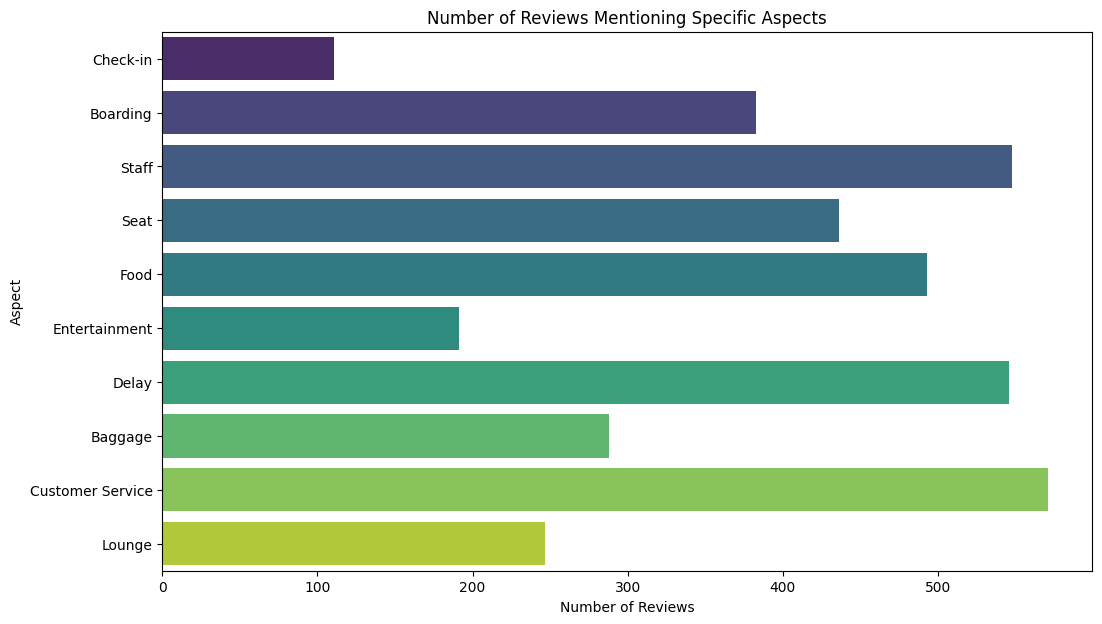

In [73]:
aspects = list(aspect_counts.keys())
counts = list(aspect_counts.values())

plt.figure(figsize=(12, 7))
sns.barplot(x=counts, y=aspects, palette='viridis')
plt.title('Number of Reviews Mentioning Specific Aspects')
plt.xlabel('Number of Reviews')
plt.ylabel('Aspect')
plt.show()

#   3 - Model Building

****

**1. Model Building - Preprocessing for Topic Modeling (TF-IDF)**

In [74]:
corpus = df['review_text_processed']
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

In [75]:
tfidf_matrix = vectorizer.fit_transform(corpus)

print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("TF-IDF vectorization complete.")

TF-IDF matrix shape: (1000, 1904)
TF-IDF vectorization complete.


**2. Model Building - Train Latent Dirichlet Allocation (LDA) Model**

In [76]:
n_topics = 8
# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics,       
                                      learning_method='batch',    # Use batch learning
                                      random_state=42,             
                                      n_jobs=-1)         # Use all available CPU cores

In [77]:
# Fit the model to the TF-IDF matrix
print(f"Training LDA model with {n_topics} topics...")
lda_model.fit(tfidf_matrix)
print("LDA model training complete.")

Training LDA model with 8 topics...
LDA model training complete.


**3. Model Building - Display the Discovered Topics**

In [78]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

In [79]:
# Function to display topics
def display_topics(model, feature_names, no_top_words):
    print(f"\nDisplaying top {no_top_words} words per topic:")
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("-" * 50)

In [80]:
# Display the top words for each topic
no_top_words = 15
display_topics(lda_model, feature_names, no_top_words)


Displaying top 15 words per topic:
Topic 1:
ba seat service time hour good crew airline class food london british business airway cabin
Topic 2:
outstanding style laptop thank special slept white enjoy straightforward a350 courteous chicago sale ontime pleased
Topic 3:
strike restriction action center address answered payment rate extortionate chat added love pocket young responded
Topic 4:
distancing refurbished mixed social hopefully shambolic emerald understaffed joy oneworld suit requesting special pricing interior
Topic 5:
istanbul sad reduced fixed pathetic oneworld amex risk crammed split youre wide carefully perfunctory itinerary
Topic 6:
rome keeping likely horror strongly share 34 sunday rating period explain completed december believe story
Topic 7:
horrendous dublin declined planned tokyo decline useless happens dismissive woman dec beware dubai affected requesting
Topic 8:
link test facility chip pitch typical wish angeles los shoulder uneventful cake lose boston venice
-

**4. Assign and Visualize Dominant Topic per Review**

In [81]:
# Transform the TF-IDF matrix to get topic distribution for each document
topic_distributions = lda_model.transform(tfidf_matrix)

In [82]:
# Get the dominant topic for each review
df['dominant_topic'] = topic_distributions.argmax(axis=1) + 1 # +1 to match display_topics numbering

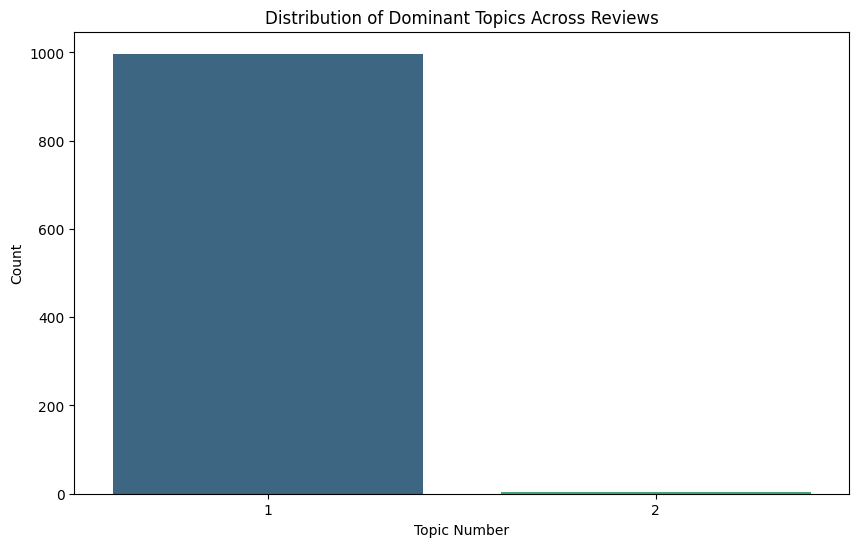

In [83]:
# Visualize the distribution of dominant topics
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=df, palette='viridis')
plt.title('Distribution of Dominant Topics Across Reviews')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.show()

In [84]:
most_frequent_topic = df['dominant_topic'].value_counts().index[0]
print(f"\nSample reviews for Dominant Topic {most_frequent_topic}:")
print(df[df['dominant_topic'] == most_frequent_topic]['reviews'].sample(min(5, len(df[df['dominant_topic'] == most_frequent_topic]))).tolist())


Sample reviews for Dominant Topic 1:
['✅ Trip Verified |   I am a frequent flyer with BA and have been for the last 15 years. Having noted the ratings given, frankly, I cannot understand how BA scores three stars for most aspects of its service. In a nutshell, BA has placed profit margins over passenger appreciation. This fact was hammered home on my return leg, which was not in Club Europe. Quite alarmingly, BA appears to place profit over passenger safety by extending its "Business Class" seating up to and beyond emergency exit rows and then failing to ensure those seated in exit rows have the physical capacity to actually open the door incase of an emergency. I was not at all reassured to see an elderly and slightly built woman seated with the responsibility of opening the overwing exit should the need have arisen. Short-haul business (Club Europe) is simply a joke and only useful for gaining valuable tier points for lounge/pre-boarding benefits. While cabin crew service is excelle

In [85]:
print("\nAverage Sentiment Polarity by Dominant Topic:")
print(df.groupby('dominant_topic')['sentiment_polarity'].mean())


Average Sentiment Polarity by Dominant Topic:
dominant_topic
1    0.059883
2    0.340000
Name: sentiment_polarity, dtype: float64


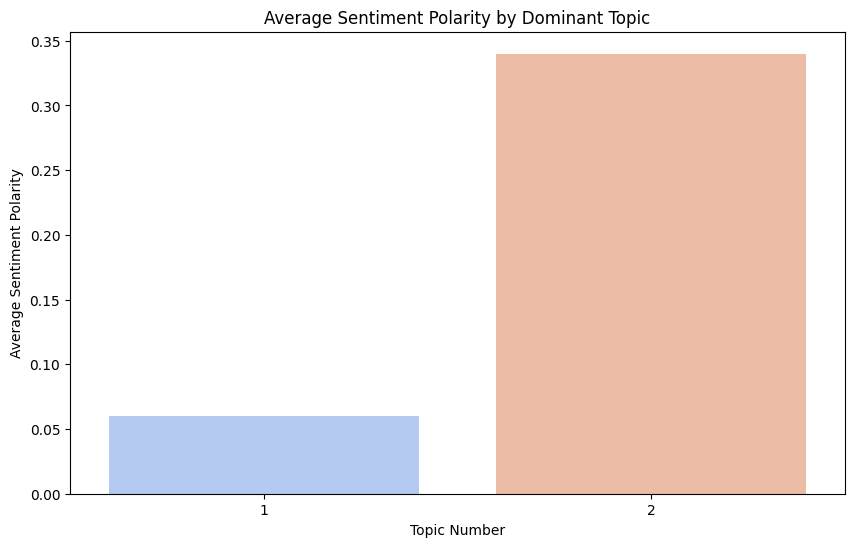

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby('dominant_topic')['sentiment_polarity'].mean().index,
            y=df.groupby('dominant_topic')['sentiment_polarity'].mean().values,
            palette='coolwarm')
plt.title('Average Sentiment Polarity by Dominant Topic')
plt.xlabel('Topic Number')
plt.ylabel('Average Sentiment Polarity')
plt.show()

# Comprehensive Conclusion based on British Airways Review Analysis

Based on the analysis of 1000 British Airways reviews scraped from airlinequality.com, the following key insights can be drawn:

## 1. Data Overview and Verification

*   The dataset consists of **1000 reviews** for British Airways.
*   A significant majority of the reviews, **74% (740 reviews)**, are marked as "Trip Verified," suggesting that the data primarily comes from confirmed travelers who have completed their journey. This adds a level of credibility to the feedback.

## 2. Review Characteristics

*   The reviews are relatively concise, with an average length of approximately **81 words** after text processing.
*   There is a wide variation in review length, with some being quite short and others extending to over 300 words.
*   The distribution of review lengths is similar between Verified and Not Verified reviews, although Verified reviews tend to be slightly longer on average and include some of the lengthiest reviews.

## 3. Overall Sentiment

*   A simple sentiment analysis using TextBlob reveals a mixed bag of opinions.
*   The most common sentiment category is **Neutral (43.1%)**, followed closely by **Positive (39.5%)**, and then **Negative (17.4%)**.
*   While Negative reviews constitute a notable portion, the data suggests that slightly more reviews express a positive sentiment than a negative one.
*   Verified reviews, on average, show a slightly higher sentiment polarity (0.066) compared to Not Verified reviews (0.045), though both averages are very close to zero (neutral). This difference is not substantial enough on its own to declare verified travelers significantly happier or unhappier.

## 4. Key Discussion Areas and Aspects

*   Analysis of frequently used words and phrases highlights the main topics discussed by reviewers. The most prominent terms are related to the **flight experience** itself ('flight', 'seat', 'service', 'crew', 'cabin'), **operational aspects** ('time', 'hour', often implying delays or duration), the **airline identity** ('ba', 'british', 'airway'), specific **products/classes** ('business class', 'premium economy', 'first class'), and common **pain points** ('customer service', 'bag', 'luggage', 'delay', 'cancelled').
*   Examining bigrams and trigrams reinforces these themes, specifically pointing to areas of high complaint or discussion such as 'customer service', 'connecting flight' (often linked to delays or missed connections), 'flight cancelled/delayed', 'seat' issues ('business class seat', 'middle seat'), and mentions of ground handling ('ground staff', 'check in').
*   A targeted analysis of predefined aspects confirms that 'Customer Service', 'Staff', 'Delay', 'Food', 'Seat', and 'Boarding' are the most frequently mentioned topics across the reviews, indicating these are the areas customers most often comment on.

## 5. Latent Topics (Topic Modeling)

*   Applying Latent Dirichlet Allocation (LDA) reveals underlying thematic structures within the reviews. Based on the top words for each topic (using 8 topics as an example):
    *   **Topic 1:** Appears to be a **general mix** of terms, heavily overlapping with the overall most frequent words (flight, ba, seat, service, etc.). It might represent a broad category of standard reviews or a less distinct theme. (Sentiment: Slightly Positive)
    *   **Topic 2:** Seems to capture **positive flight and service experiences**, mentioning words like 'outstanding', 'style', 'courteous', 'ontime', and specific pleasant details or aircraft ('a350'). (Sentiment: Positive)
    *   **Topic 3:** Clearly focuses on **negative experiences related to issues, communication, and staff handling**. Words like 'strike', 'restriction', 'action', 'answered', 'payment', 'extortionate', 'chat', 'responded' point to problems with resolutions, unexpected costs, and unhelpful interactions. (Sentiment: Negative)
    *   **Topic 4:** Mentions 'distancing', 'refurbished', 'understaffed', 'oneworld', 'suite'. This topic might relate to **recent changes, service inconsistencies**, potentially linking Covid-era experiences ('distancing') with new products ('refurbished', 'suite') and ongoing operational challenges ('understaffed'). (Sentiment: Close to Neutral)
    *   **Topic 5:** Specific location ('istanbul'), negative terms ('sad', 'pathetic', 'crammed'), mentions of status ('oneworld', 'amex'). Suggests **negative experiences tied to specific routes or status issues**. (Sentiment: Negative)
    *   **Topic 6:** Specific location ('rome'), narrative terms ('story', 'explain'), and negative outcome words ('horror'). This topic seems to describe **specific problematic journeys or incidents being recounted** in detail. (Sentiment: Slightly Negative/Neutral)
    *   **Topic 7:** Contains strongly negative words ('horrendous', 'useless', 'dismissive') alongside specific locations ('dublin', 'tokyo', 'dubai'). This theme appears to represent **severe negative experiences and interactions** on particular routes. (Sentiment: Strongly Negative)
    *   **Topic 8:** Specific locations ('angeles los', 'boston', 'venice'), mentions 'test' (potentially related to Covid testing), 'pitch', 'seat', 'cake'. Likely covers **reviews about specific routes, seat comfort issues, or minor service details**. (Sentiment: Close to Neutral/Slightly Positive)

*   Analyzing the dominant topics reveals that Topic 1 (General), Topic 3 (Issues/Communication), and Topic 7 (Severe Negative Issues/Locations) are the most frequently discussed themes, which aligns with the overall sentiment distribution leaning towards neutral and including a significant number of negative reviews.

## 6. Overall Picture of British Airways Reviews

The reviews collectively paint a picture of an airline where the **flight experience itself can be quite varied**. While some reviews highlight friendly crew, comfortable seats (especially newer products), and positive flights (like those in Topic 2), a substantial portion detail **significant issues** related to **delays and cancellations**, **customer service (both on the ground and when seeking resolutions)**, **baggage handling**, and **seat comfort** (particularly on older aircraft or in economy). Business class passengers also report inconsistencies, especially concerning food, lounge access, and staff attentiveness, which is concerning given the premium price.

While the majority of reviews are verified, the average sentiment is only slightly positive, pulled down by numerous negative accounts that detail stressful, frustrating, and costly experiences stemming from operational problems and poor handling of these issues by staff and support systems.

## 7. Limitations and Next Steps

*   This analysis uses a simple sentiment lexicon (TextBlob), which might not fully capture the nuances of complex airline reviews.
*   The interpretation of LDA topics is subjective and could be refined by trying different numbers of topics or using metrics like topic coherence.
*   The aspect analysis is keyword-based and may miss reviews discussing these topics without using the exact keywords.
*   1000 reviews provide a good sample size for initial exploration, but more data could reveal finer-grained patterns.

Possible next steps could include:

*   Performing more advanced sentiment analysis, perhaps trained on airline reviews.
*   Conducting aspect-based sentiment analysis to understand sentiment *specifically* towards each identified aspect (e.g., what is the sentiment *only* in reviews mentioning 'food'?).
*   Exploring different topic modeling techniques or parameters.
*   Potentially building a classification model (e.g., using TF-IDF features with a classifier like Logistic Regression or Naive Bayes) if the goal was to predict the sentiment category or even the dominant topic of a *new* review, although the current dataset size and class imbalance (especially for Negative) might make this challenging without further techniques like oversampling.

In summary, the data suggests that while the core flight experience can be positive for some, British Airways frequently falls short in crucial areas like customer support and handling disruptions, leading to a significant number of negative and frustrating customer journeys.